# **LAPORAN PRAKTIKUM ANN**
*Laporan diperuntukan sebagai pemenuh syarat penilaian praktikum mata kuliah Deep Learning*

```
Dosen Pengampu : Sevi Nurafni
Oleh : Catherine V. Pang 2C2220008 VI/A
Hari, Tanggal: Selasa, 11 Maret 2025
Pertemuan Ke: 1
PROGRAM STUDI S1 SAINS DATA FAKULTAS SAINS DAN TEKNOLOGI UNIVERSITAS KOPERASI INDONESIA 2025
```

# Modul Praktikum: Implementasi ANN untuk Optimasi

Artificial Neural Network (ANN) merupakan metode pembelajaran mesin yang banyak digunakan untuk menyelesaikan berbagai permasalahan, termasuk optimasi. Dalam praktikum ini, kita akan mengimplementasikan ANN sederhana untuk menyelesaikan masalah optimasi menggunakan dataset nyata.

### 1. Persiapan Lingkungan

Pastikan pustaka berikut telah terinstal:

In [ ]:
pip install numpy pandas tensorflow matplotlib scikit-learn

### 2. Import Library
Kode ini mengimpor pustaka yang digunakan untuk manipulasi data, pembuatan ANN, serta preprocessing data.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### 3. Memuat Dataset
*   Mengunduh dataset harga rumah.
*   Memilih fitur median_income sebagai input dan median_house_value sebagai target.

In [ ]:
dataset_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(dataset_url)
print(df.head(5))

X = df[["median_income"]].values  # Fitur
y = df["median_house_value"].values.reshape(-1, 1)  # Target

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### 4. Preprocessing Data


*   Menormalisasi data agar ANN lebih cepat belajar.
*   Membagi dataset menjadi 70% data training dan 30% data testing.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### 5. Membangun Model ANN
Model ANN ini terdiri dari:

* Dua lapisan tersembunyi dengan 10 neuron dan aktivasi ReLU.
* Satu lapisan keluaran untuk regresi.
* Optimizer Adam dan fungsi loss Mean Squared Error (MSE).

In [ ]:
model = Sequential([
    Input(shape=(1,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

### 6. Training Model
Kode ini melatih model selama 100 epoch dengan data latih dan memvalidasi dengan data uji.

In [ ]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, verbose=1, validation_data=(X_test_scaled, y_test_scaled))

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0677 - val_loss: 0.0294
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0294 - val_loss: 0.0293
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0311 - val_loss: 0.0292
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0309 - val_loss: 0.0292
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0289 - val_loss: 0.0302
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0290 - val_loss: 0.0290
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0286 - val_loss: 0.0291
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0291 - val_loss: 0.0290
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0295 - val_loss: 0.0291
Epoch 10/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0287 - val_loss: 0.0289
Epoch 11/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0295 - val_loss: 0.0289
Epoch 12/100
452/452 ━━━━━━━━━━━━━━━━━━━━

### 7. Evaluasi dan Visualisasi Hasil
* Memprediksi nilai rumah berdasarkan pendapatan median.
* Menampilkan hasil prediksi dibandingkan dengan data asli.

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


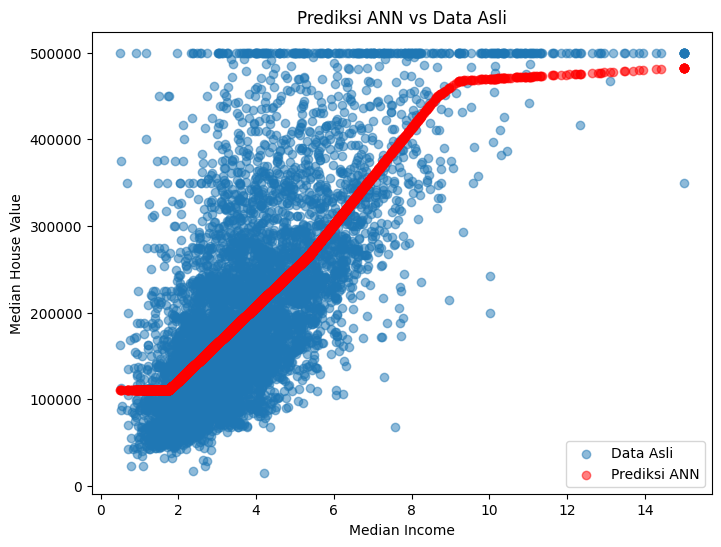

In [ ]:
y_pred = model.predict(X_test_scaled)

X_test_denorm = scaler_X.inverse_transform(X_test_scaled)
y_pred_denorm = scaler_y.inverse_transform(y_pred)
y_test_denorm = scaler_y.inverse_transform(y_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_denorm, y_test_denorm, label='Data Asli', alpha=0.5)
plt.scatter(X_test_denorm, y_pred_denorm, color='red', label='Prediksi ANN', alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Prediksi ANN vs Data Asli")
plt.show()


Model masih membentuk segmen linear yang menunjukkan bahwa mungkin belum cukup fleksibel untuk menangkap pola yang lebih kompleks.

Banyak titik data yang terhimpit di batas atas, menunjukkan bahwa model ANN belum cukup baik menangani nilai maksimum. Ini bisa jadi karena target median_house_value memiliki batas atas di dataset (banyak nilai terkunci di 500.000).


Tugas:

1.   Tambahkan jumlah neuron atau hidden layer agar model bisa menangkap pola yang lebih kompleks
2.   Eksperimen gunakan tanh atau leaky ReLU untuk meningkatkan fleksibilitas model.
3. Gunakan learning rate scheduler untuk mengoptimalkan proses pelatihan.



#Pengerjaan Tugas

## [Model 0] LeakyRELU 128, 64 X Tanh 32, 16 ADAM Optimizer Huber Loss  

Saya telah melakukan Preprocessing Data agar kualitas data yang digunakan untuk membangun model dapat lebih baik. Pada tahap ini saya melakukan **pembersihan data NaN** pada keseluruhan dataset.  Kemudian melakukan **encoding pada fitur "ocean_proximity"** menggunakan One-Hot Encoding karena data pada fitur tersebut merupakan kategori (categorical feature) dengan kata lain memiliki beberapa kategori yang berbeda:

- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN

maka fitur kategori seperti ini tidak dapat diolah langsung oleh model machine learning karena model tersebut memerlukan input berupa angka (numerik). Oleh karena itu, fitur kategori ini perlu diubah menjadi fitur numerik menggunakan teknik seperti:
- One-Hot Encoding (OHE)
- Label Encoding
- Ordinal Encoding

Dalam kasus ini, saya memilih **One-Hot Encoding (OHE)** sebagai pilihan yang tepat karena fitur "ocean_proximity" memiliki beberapa kategori yang tidak memiliki urutan atau hierarki.

Selain itu saya melakukan scaling pada dataset dengan mengganti fungsi MinMaxScaler menjadi fungsi StandarScaler. Karena dataset Housing yang kita gunakan memiliki distribusi data yang tidak seragam, dengan beberapa fitur memiliki rentang nilai yang sangat besar. Selain itu, dataset ini juga memiliki beberapa outlier yang dapat mempengaruhi performa model. Oleh karena itu, menggunakan StandardScaler sangat cocok untuk dataset ini karena dapat menangani distribusi data yang tidak seragam dan mengurangi dampak outlier. StandardScaler melakukan normalisasi dan skala pada nilai-nilai fitur, sehingga memiliki mean 0 dan standar deviasi 1. Hal ini membuat model machine learning lebih stabil dan dapat menangani distribusi data yang tidak seragam dengan lebih baik. Selain itu, StandardScaler juga dapat mengurangi dampak korelasi antar fitur pada distribusi data, sehingga membuat model lebih akurat.

Khususnya untuk model regresi linier dengan optimizer Artificial Neural Network (ANN), StandardScaler sangat cocok karena ANN rentan pada skala. Fungsi aktivasi yang digunakan dalam ANN memiliki rentang nilai yang terbatas, sehingga jika inputnya memiliki skala yang besar, maka outputnya akan terbatas pada rentang nilai yang terbatas tersebut. Dengan menggunakan StandardScaler, kita dapat mengubah skala input sehingga memiliki mean 0 dan standar deviasi 1, membuat fungsi aktivasi memiliki nilai yang lebih stabil dan tidak terlalu besar, serta proses pembelajaran menjadi lebih stabil dan akurat. Oleh karena itu, menggunakan StandardScaler sangat cocok untuk dataset Housing kita dan model regresi linier dengan optimizer ANN, sehingga dapat meningkatkan performa model dan membuatnya lebih stabil dan akurat.




###Load Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.activations import tanh # Import tanh from activations module
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Load Dataset

In [ ]:
dataset_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(dataset_url)
print(df.head(5))

X = df[["median_income"]].values  # Fitur
y = df["median_house_value"].values.reshape(-1, 1)  # Target

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


###Preprocessing Data

####Handling missing values

In [ ]:
df = df.dropna()

###Feature Engineering (convert categorical 'ocean_proximity' to one-hot)

In [ ]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Scaling

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### Learning rate scheduler

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * np.exp(-0.03)  # Changed to NumPy's exp

lr_callback = LearningRateScheduler(scheduler)

- Selama 50 epoch pertama, learning rate tetap (tidak berubah). Karena biasanya di awal pelatihan, model masih mencoba menemukan pola besar, jadi learning rate yang stabil membantu proses konvergensi awal.

- Setelah lewat epoch ke-50, learning rate mulai diturunkan secara eksponensial. Ini karena setelah model semakin dekat ke minimum loss, kita ingin model “melangkah” lebih pelan dan halus agar tidak overshoot atau memantul-mantul dari solusi optimal.

- ```tf.math.exp(-0.03)``` adalah faktor peluruhan (decay). Nilai ini mengurangi learning rate secara smooth setiap epoch setelah lewat 50 epoch. Semakin besar angka di dalam exp(-x), semakin cepat penurunannya.

Dengan kata lain:

- Awal = fokus belajar cepat & kasar.

- Setelah 50 epoch = fokus memperhalus & menyempurnakan model.

###ANN Modelling

In [ ]:
# Build ANN model dengan lebih kompleks dan LeakyReLU
def build_model():
    model = Sequential([
        Input(shape=(1,)),
        Dense(128),
        LeakyReLU(alpha=0.1),
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(32, activation='tanh'),
        Dense(16, activation='tanh'),
        Dense(1)
    ])
    return model

model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


####Compile the model dengan Huber loss

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.Huber(delta=1.0))

#### Training

In [ ]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    verbose=1,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[lr_callback]
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.2287 - val_loss: 0.2227 - learning_rate: 0.0010
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2204 - val_loss: 0.2235 - learning_rate: 0.0010
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2265 - val_loss: 0.2203 - learning_rate: 0.0010
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2187 - val_loss: 0.2200 - learning_rate: 0.0010
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2171 - val_loss: 0.2196 - learning_rate: 0.0010
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2162 - val_loss: 0.2195 - learning_rate: 0.0010
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2209 - val_loss: 0.2205 - learning_rate: 0.0010
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2178 - val_loss: 0.2194 - learning_rate: 0.0010
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2152 - val_loss: 0.2191 - learning_rate: 0.0010

####Prediction

In [ ]:
y_pred = model.predict(X_test_scaled)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### Denormalize

In [ ]:
y_pred_denorm = scaler_y.inverse_transform(y_pred)
y_test_denorm = scaler_y.inverse_transform(y_test_scaled)
X_test_denorm = scaler_X.inverse_transform(X_test_scaled)

####Plot hasil prediksi

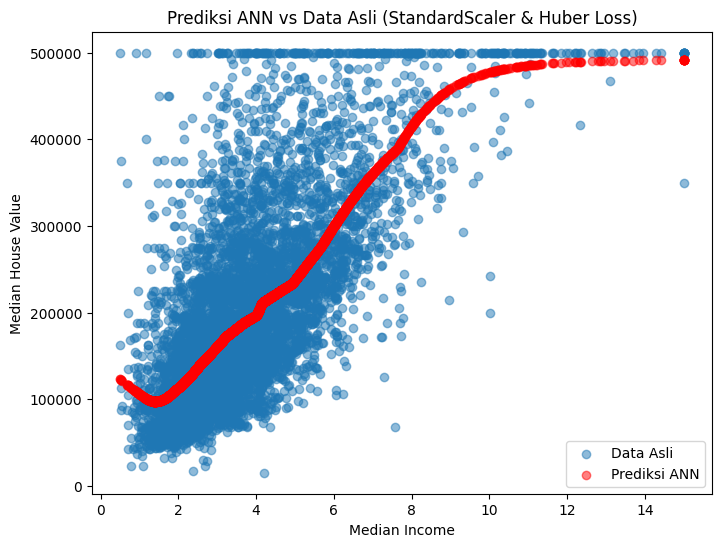

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_denorm, y_test_denorm, label='Data Asli', alpha=0.5)
plt.scatter(X_test_denorm, y_pred_denorm, color='red', label='Prediksi ANN', alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Prediksi ANN vs Data Asli (StandardScaler & Huber Loss)")
plt.show()

#### Plot loss curve

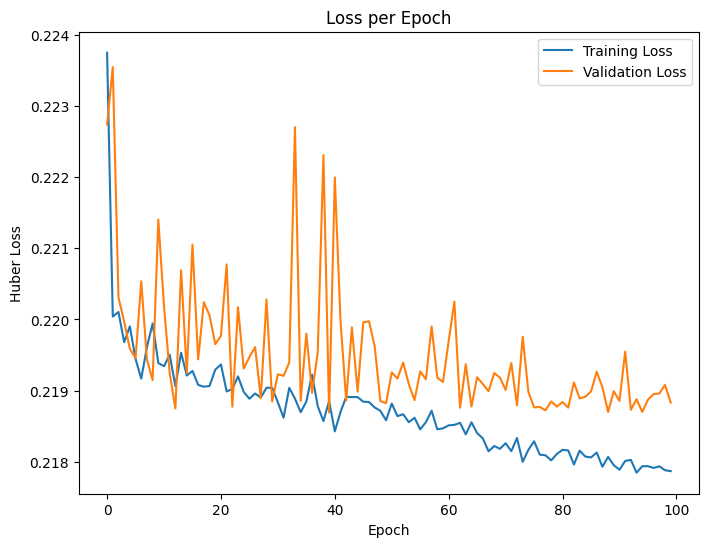

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Huber Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

### Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_denorm, y_pred_denorm)
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
r2 = r2_score(y_test_denorm, y_pred_denorm)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 60175.05518587492
Mean Squared Error (MSE): 6849310696.487812
R^2 Score: 0.4781637029061254


####Residuals Plot

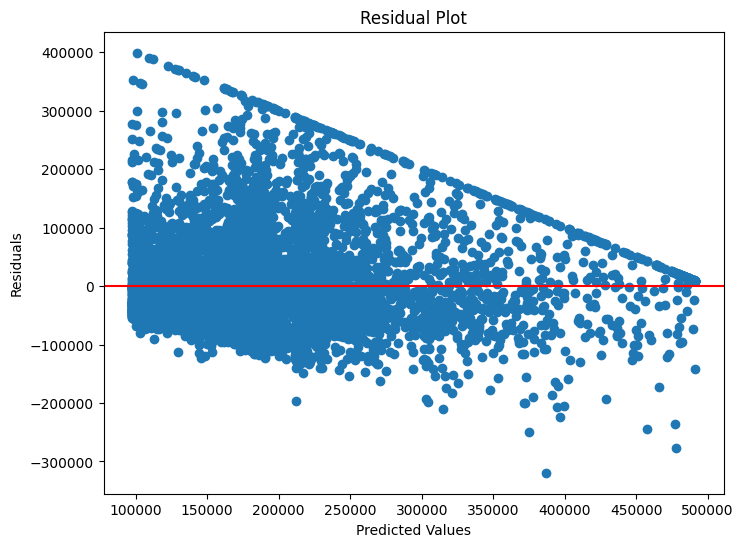

In [ ]:
# Calculate residuals
residuals = y_test_denorm - y_pred_denorm

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_denorm, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## [Model 1] LeakyRELU ADAM Optimizer Huber Loss 128, 64

Saya telah melakukan Preprocessing Data agar kualitas data yang digunakan untuk membangun model dapat lebih baik. Pada tahap ini saya melakukan **pembersihan data NaN** pada keseluruhan dataset.  Kemudian melakukan **encoding pada fitur "ocean_proximity"** menggunakan One-Hot Encoding karena data pada fitur tersebut merupakan kategori (categorical feature) dengan kata lain memiliki beberapa kategori yang berbeda:

- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN

maka fitur kategori seperti ini tidak dapat diolah langsung oleh model machine learning karena model tersebut memerlukan input berupa angka (numerik). Oleh karena itu, fitur kategori ini perlu diubah menjadi fitur numerik menggunakan teknik seperti:
- One-Hot Encoding (OHE)
- Label Encoding
- Ordinal Encoding

Dalam kasus ini, saya memilih **One-Hot Encoding (OHE)** sebagai pilihan yang tepat karena fitur "ocean_proximity" memiliki beberapa kategori yang tidak memiliki urutan atau hierarki.

Selain itu saya melakukan scaling pada dataset dengan mengganti fungsi MinMaxScaler menjadi fungsi StandarScaler. Karena dataset Housing yang kita gunakan memiliki distribusi data yang tidak seragam, dengan beberapa fitur memiliki rentang nilai yang sangat besar. Selain itu, dataset ini juga memiliki beberapa outlier yang dapat mempengaruhi performa model. Oleh karena itu, menggunakan StandardScaler sangat cocok untuk dataset ini karena dapat menangani distribusi data yang tidak seragam dan mengurangi dampak outlier. StandardScaler melakukan normalisasi dan skala pada nilai-nilai fitur, sehingga memiliki mean 0 dan standar deviasi 1. Hal ini membuat model machine learning lebih stabil dan dapat menangani distribusi data yang tidak seragam dengan lebih baik. Selain itu, StandardScaler juga dapat mengurangi dampak korelasi antar fitur pada distribusi data, sehingga membuat model lebih akurat.

Khususnya untuk model regresi linier dengan optimizer Artificial Neural Network (ANN), StandardScaler sangat cocok karena ANN rentan pada skala. Fungsi aktivasi yang digunakan dalam ANN memiliki rentang nilai yang terbatas, sehingga jika inputnya memiliki skala yang besar, maka outputnya akan terbatas pada rentang nilai yang terbatas tersebut. Dengan menggunakan StandardScaler, kita dapat mengubah skala input sehingga memiliki mean 0 dan standar deviasi 1, membuat fungsi aktivasi memiliki nilai yang lebih stabil dan tidak terlalu besar, serta proses pembelajaran menjadi lebih stabil dan akurat. Oleh karena itu, menggunakan StandardScaler sangat cocok untuk dataset Housing kita dan model regresi linier dengan optimizer ANN, sehingga dapat meningkatkan performa model dan membuatnya lebih stabil dan akurat.




###Load Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Load Dataset

In [ ]:
dataset_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(dataset_url)
print(df.head(5))

X = df[["median_income"]].values  # Fitur
y = df["median_house_value"].values.reshape(-1, 1)  # Target

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


###Preprocessing Data

####Handling missing values

In [ ]:
df = df.dropna()

###Feature Engineering (convert categorical 'ocean_proximity' to one-hot)

In [ ]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Scaling

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### Learning rate scheduler

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * np.exp(-0.03)  # Changed to NumPy's exp

lr_callback = LearningRateScheduler(scheduler)

- Selama 50 epoch pertama, learning rate tetap (tidak berubah). Karena biasanya di awal pelatihan, model masih mencoba menemukan pola besar, jadi learning rate yang stabil membantu proses konvergensi awal.

- Setelah lewat epoch ke-50, learning rate mulai diturunkan secara eksponensial. Ini karena setelah model semakin dekat ke minimum loss, kita ingin model “melangkah” lebih pelan dan halus agar tidak overshoot atau memantul-mantul dari solusi optimal.

- ```tf.math.exp(-0.03)``` adalah faktor peluruhan (decay). Nilai ini mengurangi learning rate secara smooth setiap epoch setelah lewat 50 epoch. Semakin besar angka di dalam exp(-x), semakin cepat penurunannya.

Dengan kata lain:

- Awal = fokus belajar cepat & kasar.

- Setelah 50 epoch = fokus memperhalus & menyempurnakan model.

###ANN Modelling

In [ ]:
# Build ANN model dengan lebih kompleks dan LeakyReLU
def build_model():
    model = Sequential([
        Input(shape=(1,)),
        Dense(128),
        LeakyReLU(alpha=0.1),
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(1)
    ])
    return model

model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


####Compile the model dengan Huber loss

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.Huber(delta=1.0))

#### Training

In [ ]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    verbose=1,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[lr_callback]
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2335 - val_loss: 0.2260 - learning_rate: 0.0010
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2240 - val_loss: 0.2207 - learning_rate: 0.0010
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2194 - val_loss: 0.2203 - learning_rate: 0.0010
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2293 - val_loss: 0.2205 - learning_rate: 0.0010
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2179 - val_loss: 0.2205 - learning_rate: 0.0010
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2220 - val_loss: 0.2204 - learning_rate: 0.0010
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2171 - val_loss: 0.2191 - learning_rate: 0.0010
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2146 - val_loss: 0.2195 - learning_rate: 0.0010
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2212 - val_loss: 0.2192 - learning_rate: 0.0010
E

####Prediction

In [ ]:
y_pred = model.predict(X_test_scaled)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### Denormalize

In [ ]:
y_pred_denorm = scaler_y.inverse_transform(y_pred)
y_test_denorm = scaler_y.inverse_transform(y_test_scaled)
X_test_denorm = scaler_X.inverse_transform(X_test_scaled)

####Plot hasil prediksi

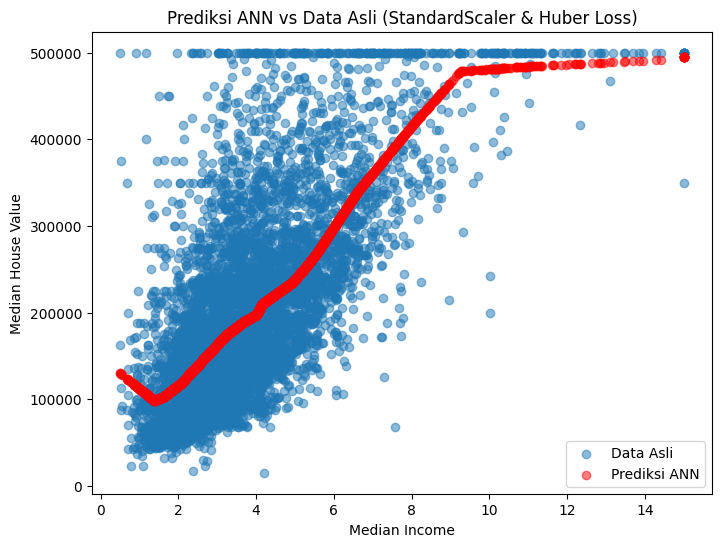

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_denorm, y_test_denorm, label='Data Asli', alpha=0.5)
plt.scatter(X_test_denorm, y_pred_denorm, color='red', label='Prediksi ANN', alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Prediksi ANN vs Data Asli (StandardScaler & Huber Loss)")
plt.show()

#### Plot loss curve

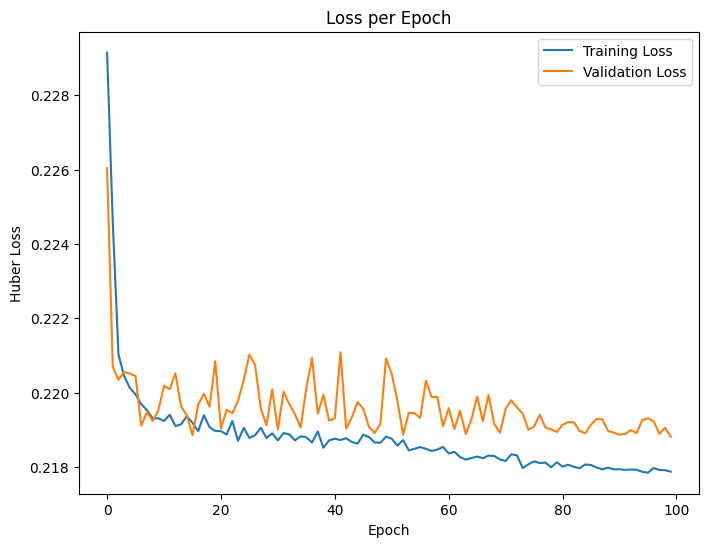

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Huber Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

### Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_denorm, y_pred_denorm)
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
r2 = r2_score(y_test_denorm, y_pred_denorm)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 60321.252697533106
Mean Squared Error (MSE): 6836468620.916735
R^2 Score: 0.47914211686045916


####Residuals Plot

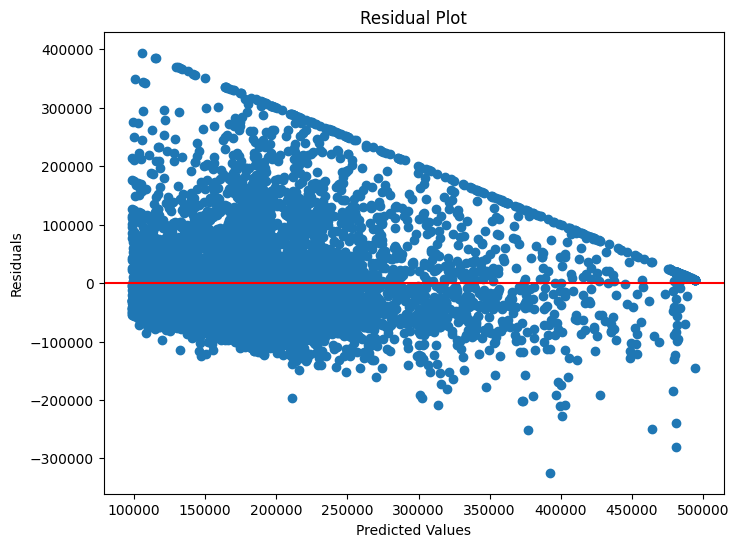

In [ ]:
# Calculate residuals
residuals = y_test_denorm - y_pred_denorm

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_denorm, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Epoch 50/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2152 - val_loss: 0.2188 - learning_rate: 0.0010:



**Berdasarkan Tugas:**

1. Tambahkan jumlah neuron atau hidden layer agar model bisa menangkap pola yang lebih kompleks


2. Eksperimen gunakan tanh atau leaky ReLU untuk meningkatkan fleksibilitas model.
3. Gunakan learning rate scheduler untuk mengoptimalkan proses pelatihan.

## [Model 2] LeakyRELU ADAM Optimizer Huber Loss 64, 32

Saya telah melakukan Preprocessing Data agar kualitas data yang digunakan untuk membangun model dapat lebih baik. Pada tahap ini saya melakukan **pembersihan data NaN** pada keseluruhan dataset.  Kemudian melakukan **encoding pada fitur "ocean_proximity"** menggunakan One-Hot Encoding karena data pada fitur tersebut merupakan kategori (categorical feature) dengan kata lain memiliki beberapa kategori yang berbeda:

- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN

maka fitur kategori seperti ini tidak dapat diolah langsung oleh model machine learning karena model tersebut memerlukan input berupa angka (numerik). Oleh karena itu, fitur kategori ini perlu diubah menjadi fitur numerik menggunakan teknik seperti:
- One-Hot Encoding (OHE)
- Label Encoding
- Ordinal Encoding

Dalam kasus ini, saya memilih **One-Hot Encoding (OHE)** sebagai pilihan yang tepat karena fitur "ocean_proximity" memiliki beberapa kategori yang tidak memiliki urutan atau hierarki.

Selain itu saya melakukan scaling pada dataset dengan mengganti fungsi MinMaxScaler menjadi fungsi StandarScaler. Karena dataset Housing yang kita gunakan memiliki distribusi data yang tidak seragam, dengan beberapa fitur memiliki rentang nilai yang sangat besar. Selain itu, dataset ini juga memiliki beberapa outlier yang dapat mempengaruhi performa model. Oleh karena itu, menggunakan StandardScaler sangat cocok untuk dataset ini karena dapat menangani distribusi data yang tidak seragam dan mengurangi dampak outlier. StandardScaler melakukan normalisasi dan skala pada nilai-nilai fitur, sehingga memiliki mean 0 dan standar deviasi 1. Hal ini membuat model machine learning lebih stabil dan dapat menangani distribusi data yang tidak seragam dengan lebih baik. Selain itu, StandardScaler juga dapat mengurangi dampak korelasi antar fitur pada distribusi data, sehingga membuat model lebih akurat.

Khususnya untuk model regresi linier dengan optimizer Artificial Neural Network (ANN), StandardScaler sangat cocok karena ANN rentan pada skala. Fungsi aktivasi yang digunakan dalam ANN memiliki rentang nilai yang terbatas, sehingga jika inputnya memiliki skala yang besar, maka outputnya akan terbatas pada rentang nilai yang terbatas tersebut. Dengan menggunakan StandardScaler, kita dapat mengubah skala input sehingga memiliki mean 0 dan standar deviasi 1, membuat fungsi aktivasi memiliki nilai yang lebih stabil dan tidak terlalu besar, serta proses pembelajaran menjadi lebih stabil dan akurat. Oleh karena itu, menggunakan StandardScaler sangat cocok untuk dataset Housing kita dan model regresi linier dengan optimizer ANN, sehingga dapat meningkatkan performa model dan membuatnya lebih stabil dan akurat.




###Load Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Load Dataset

In [ ]:
dataset_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(dataset_url)
print(df.head(5))

X = df[["median_income"]].values  # Fitur
y = df["median_house_value"].values.reshape(-1, 1)  # Target

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


###Preprocessing Data

####Handling missing values

In [ ]:
df = df.dropna()

###Feature Engineering (convert categorical 'ocean_proximity' to one-hot)

In [ ]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Scaling

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### Learning rate scheduler

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * np.exp(-0.03)  # Changed to NumPy's exp

lr_callback = LearningRateScheduler(scheduler)

- Selama 50 epoch pertama, learning rate tetap (tidak berubah). Karena biasanya di awal pelatihan, model masih mencoba menemukan pola besar, jadi learning rate yang stabil membantu proses konvergensi awal.

- Setelah lewat epoch ke-50, learning rate mulai diturunkan secara eksponensial. Ini karena setelah model semakin dekat ke minimum loss, kita ingin model “melangkah” lebih pelan dan halus agar tidak overshoot atau memantul-mantul dari solusi optimal.

- ```tf.math.exp(-0.03)``` adalah faktor peluruhan (decay). Nilai ini mengurangi learning rate secara smooth setiap epoch setelah lewat 50 epoch. Semakin besar angka di dalam exp(-x), semakin cepat penurunannya.

Dengan kata lain:

- Awal = fokus belajar cepat & kasar.

- Setelah 50 epoch = fokus memperhalus & menyempurnakan model.

###ANN Modelling

In [ ]:
# Build ANN model dengan lebih kompleks dan LeakyReLU
def build_model():
    model = Sequential([
        Input(shape=(1,)),
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(32),
        LeakyReLU(alpha=0.1),
        Dense(1)
    ])
    return model

model = build_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


####Compile the model dengan Huber loss

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.Huber(delta=1.0))

#### Training

In [ ]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    verbose=1,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[lr_callback]
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2626 - val_loss: 0.2248 - learning_rate: 0.0010
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2241 - val_loss: 0.2247 - learning_rate: 0.0010
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2254 - val_loss: 0.2212 - learning_rate: 0.0010
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2244 - val_loss: 0.2203 - learning_rate: 0.0010
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2206 - val_loss: 0.2210 - learning_rate: 0.0010
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2180 - val_loss: 0.2217 - learning_rate: 0.0010
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2258 - val_loss: 0.2202 - learning_rate: 0.0010
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2232 - val_loss: 0.2200 - learning_rate: 0.0010
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2249 - val_loss: 0.2209 - learning_rate: 0.0010
E

Error yang saya alami disebabkan oleh karena nilai learning rate yang saya gunakan tidak sesuai dengan tipe data yang diharapkan oleh fungsi learning_rate_scheduler.

Nilai learning rate yang saya gunakan adalah 0.0100, tetapi nilai ini tidak dapat digunakan karena tidak sesuai dengan tipe data yang diharapkan oleh fungsi learning_rate_scheduler.

Untuk memperbaiki error ini, saya mencoba beberapa hal berikut:

1. Saya pastikan nilai learning rate yang saya gunakan adalah float.
2. Digunakan nilai learning rate yang lebih kecil, seperti 0.001 atau 0.0001.
3. Tidak menggunakan fungsi learning_rate_scheduler yang tidak sesuai dengan tipe data learning rate yang saya gunakan.


####Prediction

In [ ]:
y_pred = model.predict(X_test_scaled)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


#### Denormalize

In [ ]:
y_pred_denorm = scaler_y.inverse_transform(y_pred)
y_test_denorm = scaler_y.inverse_transform(y_test_scaled)
X_test_denorm = scaler_X.inverse_transform(X_test_scaled)

####Plot hasil prediksi

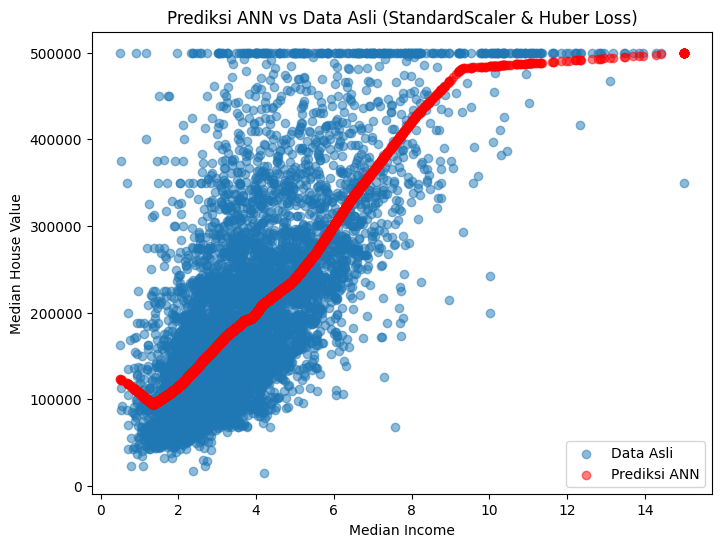

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_denorm, y_test_denorm, label='Data Asli', alpha=0.5)
plt.scatter(X_test_denorm, y_pred_denorm, color='red', label='Prediksi ANN', alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Prediksi ANN vs Data Asli (StandardScaler & Huber Loss)")
plt.show()

#### Plot loss curve

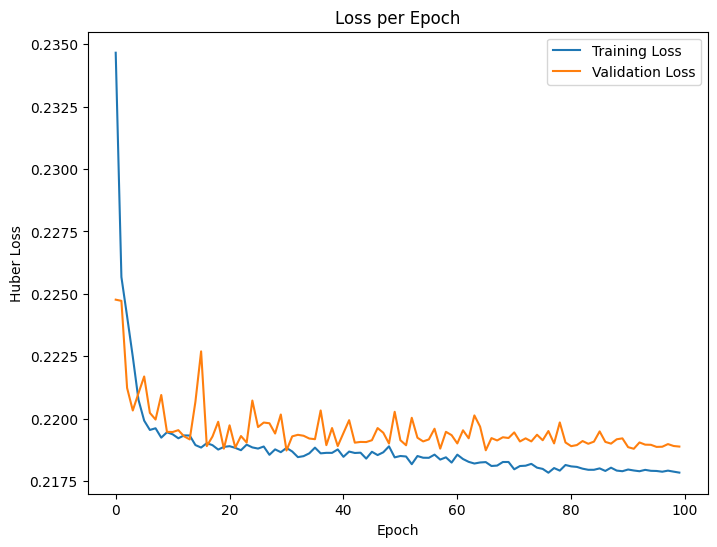

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Huber Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

### Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_denorm, y_pred_denorm)
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
r2 = r2_score(y_test_denorm, y_pred_denorm)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 60237.17942380289
Mean Squared Error (MSE): 6842730131.951022
R^2 Score: 0.4786650639310278


####Residuals Plot

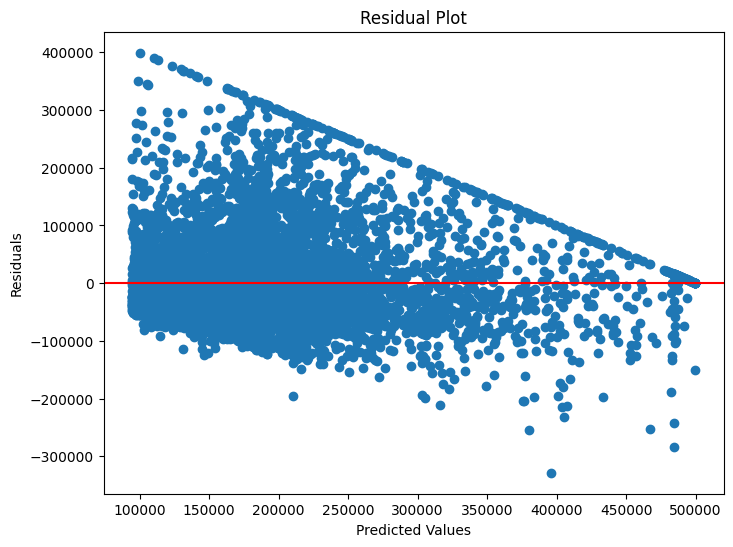

In [ ]:
# Calculate residuals
residuals = y_test_denorm - y_pred_denorm

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_denorm, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## [Model 3] Tanh ADAM Optimizer Huber Loss 64, 32

Saya telah melakukan Preprocessing Data agar kualitas data yang digunakan untuk membangun model dapat lebih baik. Pada tahap ini saya melakukan **pembersihan data NaN** pada keseluruhan dataset.  Kemudian melakukan **encoding pada fitur "ocean_proximity"** menggunakan One-Hot Encoding karena data pada fitur tersebut merupakan kategori (categorical feature) dengan kata lain memiliki beberapa kategori yang berbeda:

- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN

maka fitur kategori seperti ini tidak dapat diolah langsung oleh model machine learning karena model tersebut memerlukan input berupa angka (numerik). Oleh karena itu, fitur kategori ini perlu diubah menjadi fitur numerik menggunakan teknik seperti:
- One-Hot Encoding (OHE)
- Label Encoding
- Ordinal Encoding

Dalam kasus ini, saya memilih **One-Hot Encoding (OHE)** sebagai pilihan yang tepat karena fitur "ocean_proximity" memiliki beberapa kategori yang tidak memiliki urutan atau hierarki.

Selain itu saya melakukan scaling pada dataset dengan mengganti fungsi MinMaxScaler menjadi fungsi StandarScaler. Karena dataset Housing yang kita gunakan memiliki distribusi data yang tidak seragam, dengan beberapa fitur memiliki rentang nilai yang sangat besar. Selain itu, dataset ini juga memiliki beberapa outlier yang dapat mempengaruhi performa model. Oleh karena itu, menggunakan StandardScaler sangat cocok untuk dataset ini karena dapat menangani distribusi data yang tidak seragam dan mengurangi dampak outlier. StandardScaler melakukan normalisasi dan skala pada nilai-nilai fitur, sehingga memiliki mean 0 dan standar deviasi 1. Hal ini membuat model machine learning lebih stabil dan dapat menangani distribusi data yang tidak seragam dengan lebih baik. Selain itu, StandardScaler juga dapat mengurangi dampak korelasi antar fitur pada distribusi data, sehingga membuat model lebih akurat.

Khususnya untuk model regresi linier dengan optimizer Artificial Neural Network (ANN), StandardScaler sangat cocok karena ANN rentan pada skala. Fungsi aktivasi yang digunakan dalam ANN memiliki rentang nilai yang terbatas, sehingga jika inputnya memiliki skala yang besar, maka outputnya akan terbatas pada rentang nilai yang terbatas tersebut. Dengan menggunakan StandardScaler, kita dapat mengubah skala input sehingga memiliki mean 0 dan standar deviasi 1, membuat fungsi aktivasi memiliki nilai yang lebih stabil dan tidak terlalu besar, serta proses pembelajaran menjadi lebih stabil dan akurat. Oleh karena itu, menggunakan StandardScaler sangat cocok untuk dataset Housing kita dan model regresi linier dengan optimizer ANN, sehingga dapat meningkatkan performa model dan membuatnya lebih stabil dan akurat.




###Load Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Load Dataset

In [ ]:
dataset_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(dataset_url)
print(df.head(5))

X = df[["median_income"]].values  # Fitur
y = df["median_house_value"].values.reshape(-1, 1)  # Target

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


###Preprocessing Data

####Handling missing values

In [ ]:
df = df.dropna()

###Feature Engineering (convert categorical 'ocean_proximity' to one-hot)

In [ ]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Scaling

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### Learning rate scheduler

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * np.exp(-0.03)  # Changed to NumPy's exp

lr_callback = LearningRateScheduler(scheduler)

- Selama 50 epoch pertama, learning rate tetap (tidak berubah). Karena biasanya di awal pelatihan, model masih mencoba menemukan pola besar, jadi learning rate yang stabil membantu proses konvergensi awal.

- Setelah lewat epoch ke-50, learning rate mulai diturunkan secara eksponensial. Ini karena setelah model semakin dekat ke minimum loss, kita ingin model “melangkah” lebih pelan dan halus agar tidak overshoot atau memantul-mantul dari solusi optimal.

- ```tf.math.exp(-0.03)``` adalah faktor peluruhan (decay). Nilai ini mengurangi learning rate secara smooth setiap epoch setelah lewat 50 epoch. Semakin besar angka di dalam exp(-x), semakin cepat penurunannya.

Dengan kata lain:

- Awal = fokus belajar cepat & kasar.

- Setelah 50 epoch = fokus memperhalus & menyempurnakan model.

###ANN Modelling

In [ ]:
from tensorflow.keras.activations import tanh

def build_model():
    model = Sequential([
        Input(shape=(1,)),
        Dense(64, activation=tanh),
        Dense(32, activation=tanh),
        Dense(1)
    ])
    return model

model = build_model()

####Compile the model dengan Huber loss

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.Huber(delta=1.0))

#### Training

In [ ]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    verbose=1,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[lr_callback]
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.2346 - val_loss: 0.2225 - learning_rate: 0.0010
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2243 - val_loss: 0.2212 - learning_rate: 0.0010
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2221 - val_loss: 0.2207 - learning_rate: 0.0010
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2184 - val_loss: 0.2220 - learning_rate: 0.0010
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2253 - val_loss: 0.2204 - learning_rate: 0.0010
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2203 - val_loss: 0.2229 - learning_rate: 0.0010
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2193 - val_loss: 0.2211 - learning_rate: 0.0010
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2202 - val_loss: 0.2224 - learning_rate: 0.0010
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2200 - val_loss: 0.2208 - learning_rate: 0.0010
E

####Prediction

In [ ]:
y_pred = model.predict(X_test_scaled)

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#### Denormalize

In [ ]:
y_pred_denorm = scaler_y.inverse_transform(y_pred)
y_test_denorm = scaler_y.inverse_transform(y_test_scaled)
X_test_denorm = scaler_X.inverse_transform(X_test_scaled)

####Plot hasil prediksi

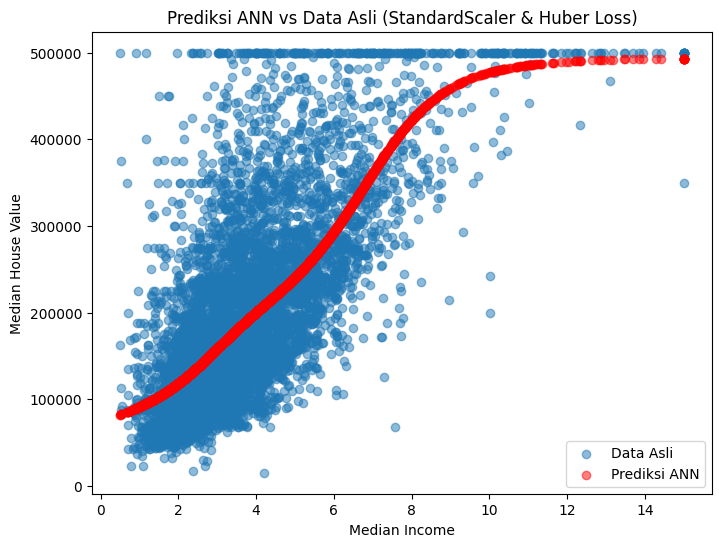

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_denorm, y_test_denorm, label='Data Asli', alpha=0.5)
plt.scatter(X_test_denorm, y_pred_denorm, color='red', label='Prediksi ANN', alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Prediksi ANN vs Data Asli (StandardScaler & Huber Loss)")
plt.show()

#### Plot loss curve

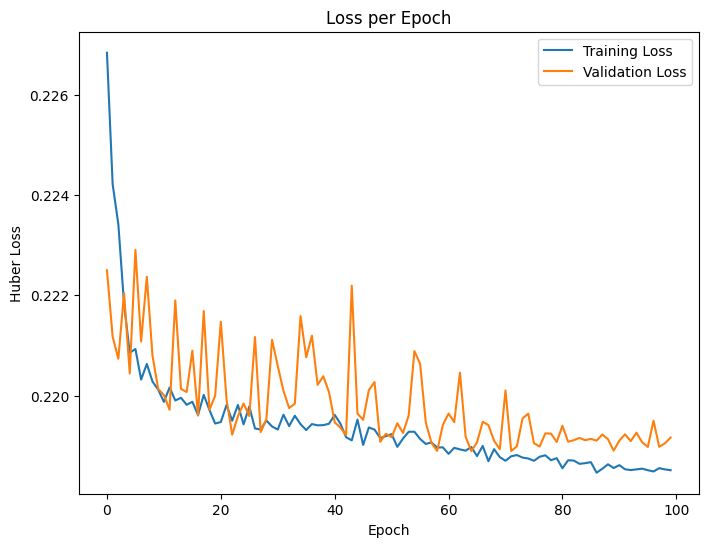

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Huber Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

### Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_denorm, y_pred_denorm)
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
r2 = r2_score(y_test_denorm, y_pred_denorm)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 60220.960437863374
Mean Squared Error (MSE): 6880059816.938876
R^2 Score: 0.475820984366097


####Residuals Plot

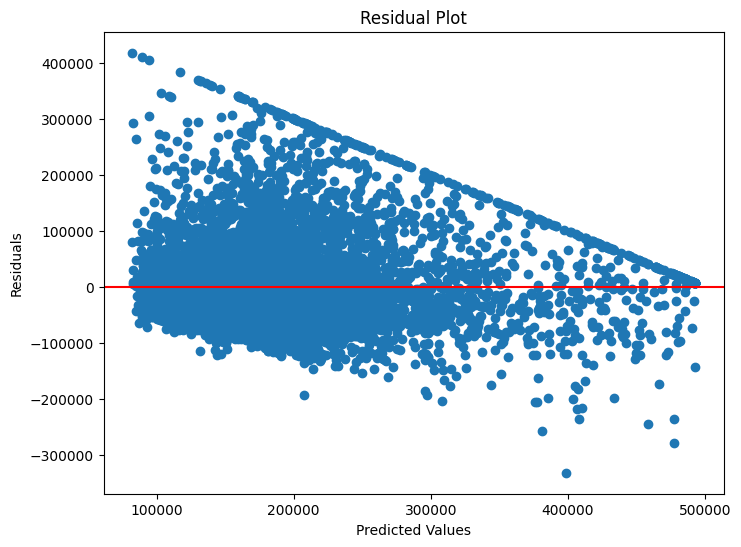

In [ ]:
# Calculate residuals
residuals = y_test_denorm - y_pred_denorm

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_denorm, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## [Model 4] Tanh ADAM Optimizer Huber Loss 128, 64

Saya telah melakukan Preprocessing Data agar kualitas data yang digunakan untuk membangun model dapat lebih baik. Pada tahap ini saya melakukan **pembersihan data NaN** pada keseluruhan dataset.  Kemudian melakukan **encoding pada fitur "ocean_proximity"** menggunakan One-Hot Encoding karena data pada fitur tersebut merupakan kategori (categorical feature) dengan kata lain memiliki beberapa kategori yang berbeda:

- INLAND
- ISLAND
- NEAR BAY
- NEAR OCEAN

maka fitur kategori seperti ini tidak dapat diolah langsung oleh model machine learning karena model tersebut memerlukan input berupa angka (numerik). Oleh karena itu, fitur kategori ini perlu diubah menjadi fitur numerik menggunakan teknik seperti:
- One-Hot Encoding (OHE)
- Label Encoding
- Ordinal Encoding

Dalam kasus ini, saya memilih **One-Hot Encoding (OHE)** sebagai pilihan yang tepat karena fitur "ocean_proximity" memiliki beberapa kategori yang tidak memiliki urutan atau hierarki.

Selain itu saya melakukan scaling pada dataset dengan mengganti fungsi MinMaxScaler menjadi fungsi StandarScaler. Karena dataset Housing yang kita gunakan memiliki distribusi data yang tidak seragam, dengan beberapa fitur memiliki rentang nilai yang sangat besar. Selain itu, dataset ini juga memiliki beberapa outlier yang dapat mempengaruhi performa model. Oleh karena itu, menggunakan StandardScaler sangat cocok untuk dataset ini karena dapat menangani distribusi data yang tidak seragam dan mengurangi dampak outlier. StandardScaler melakukan normalisasi dan skala pada nilai-nilai fitur, sehingga memiliki mean 0 dan standar deviasi 1. Hal ini membuat model machine learning lebih stabil dan dapat menangani distribusi data yang tidak seragam dengan lebih baik. Selain itu, StandardScaler juga dapat mengurangi dampak korelasi antar fitur pada distribusi data, sehingga membuat model lebih akurat.

Khususnya untuk model regresi linier dengan optimizer Artificial Neural Network (ANN), StandardScaler sangat cocok karena ANN rentan pada skala. Fungsi aktivasi yang digunakan dalam ANN memiliki rentang nilai yang terbatas, sehingga jika inputnya memiliki skala yang besar, maka outputnya akan terbatas pada rentang nilai yang terbatas tersebut. Dengan menggunakan StandardScaler, kita dapat mengubah skala input sehingga memiliki mean 0 dan standar deviasi 1, membuat fungsi aktivasi memiliki nilai yang lebih stabil dan tidak terlalu besar, serta proses pembelajaran menjadi lebih stabil dan akurat. Oleh karena itu, menggunakan StandardScaler sangat cocok untuk dataset Housing kita dan model regresi linier dengan optimizer ANN, sehingga dapat meningkatkan performa model dan membuatnya lebih stabil dan akurat.




###Load Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Load Dataset

In [ ]:
dataset_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(dataset_url)
print(df.head(5))

X = df[["median_income"]].values  # Fitur
y = df["median_house_value"].values.reshape(-1, 1)  # Target

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


###Preprocessing Data

####Handling missing values

In [ ]:
df = df.dropna()

###Feature Engineering (convert categorical 'ocean_proximity' to one-hot)

In [ ]:
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

### Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Data Scaling

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

### Learning rate scheduler

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 50:
        return lr
    else:
        return lr * np.exp(-0.03)  # Changed to NumPy's exp

lr_callback = LearningRateScheduler(scheduler)

- Selama 50 epoch pertama, learning rate tetap (tidak berubah). Karena biasanya di awal pelatihan, model masih mencoba menemukan pola besar, jadi learning rate yang stabil membantu proses konvergensi awal.

- Setelah lewat epoch ke-50, learning rate mulai diturunkan secara eksponensial. Ini karena setelah model semakin dekat ke minimum loss, kita ingin model “melangkah” lebih pelan dan halus agar tidak overshoot atau memantul-mantul dari solusi optimal.

- ```tf.math.exp(-0.03)``` adalah faktor peluruhan (decay). Nilai ini mengurangi learning rate secara smooth setiap epoch setelah lewat 50 epoch. Semakin besar angka di dalam exp(-x), semakin cepat penurunannya.

Dengan kata lain:

- Awal = fokus belajar cepat & kasar.

- Setelah 50 epoch = fokus memperhalus & menyempurnakan model.

###ANN Modelling

In [ ]:
from tensorflow.keras.activations import tanh

def build_model():
    model = Sequential([
        Input(shape=(1,)),
        Dense(128, activation=tanh),
        Dense(64, activation=tanh),
        Dense(1)
    ])
    return model

model = build_model()

####Compile the model dengan Huber loss

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.Huber(delta=1.0))

#### Training

In [ ]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=100,
    verbose=1,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[lr_callback]
)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.2325 - val_loss: 0.2206 - learning_rate: 0.0010
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2243 - val_loss: 0.2213 - learning_rate: 0.0010
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2172 - val_loss: 0.2205 - learning_rate: 0.0010
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.2261 - val_loss: 0.2212 - learning_rate: 0.0010
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2217 - val_loss: 0.2211 - learning_rate: 0.0010
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2202 - val_loss: 0.2198 - learning_rate: 0.0010
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2213 - val_loss: 0.2222 - learning_rate: 0.0010
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2219 - val_loss: 0.2212 - learning_rate: 0.0010
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2213 - val_loss: 0.2206 - learning_rate: 0.0010


####Prediction

In [ ]:
y_pred = model.predict(X_test_scaled)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


#### Denormalize

In [ ]:
y_pred_denorm = scaler_y.inverse_transform(y_pred)
y_test_denorm = scaler_y.inverse_transform(y_test_scaled)
X_test_denorm = scaler_X.inverse_transform(X_test_scaled)

####Plot hasil prediksi

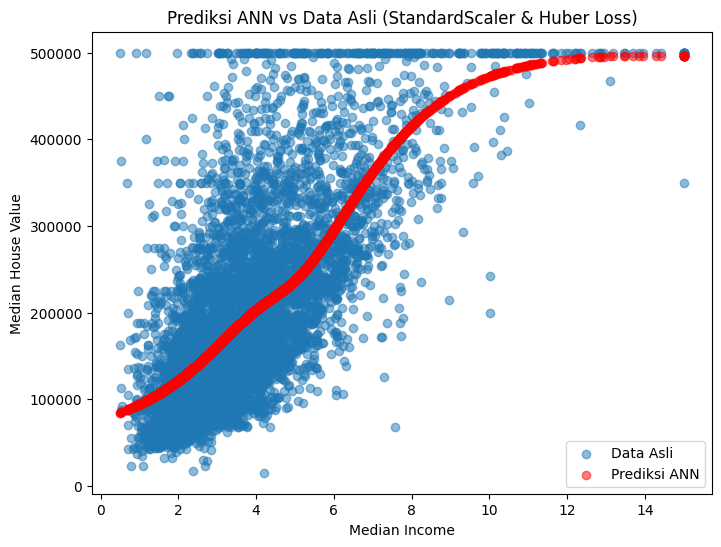

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_denorm, y_test_denorm, label='Data Asli', alpha=0.5)
plt.scatter(X_test_denorm, y_pred_denorm, color='red', label='Prediksi ANN', alpha=0.5)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.title("Prediksi ANN vs Data Asli (StandardScaler & Huber Loss)")
plt.show()

#### Plot loss curve

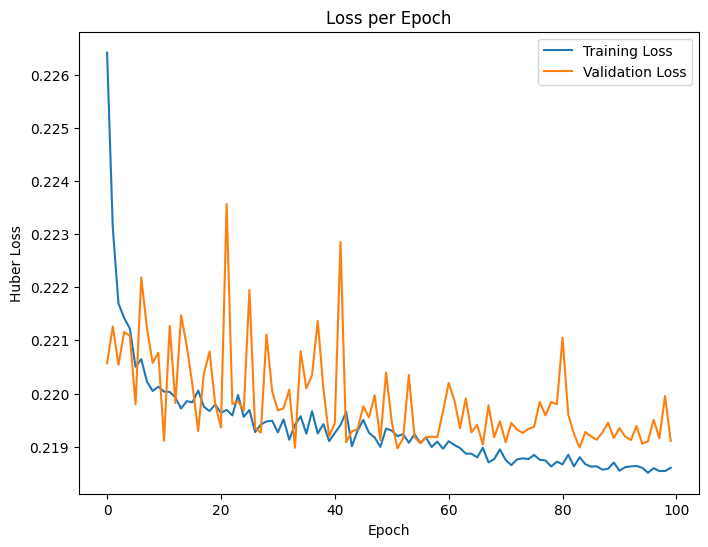

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Huber Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

### Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_denorm, y_pred_denorm)
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
r2 = r2_score(y_test_denorm, y_pred_denorm)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 60487.69850714632
Mean Squared Error (MSE): 6851106279.448149
R^2 Score: 0.47802690076578347


####Residuals Plot

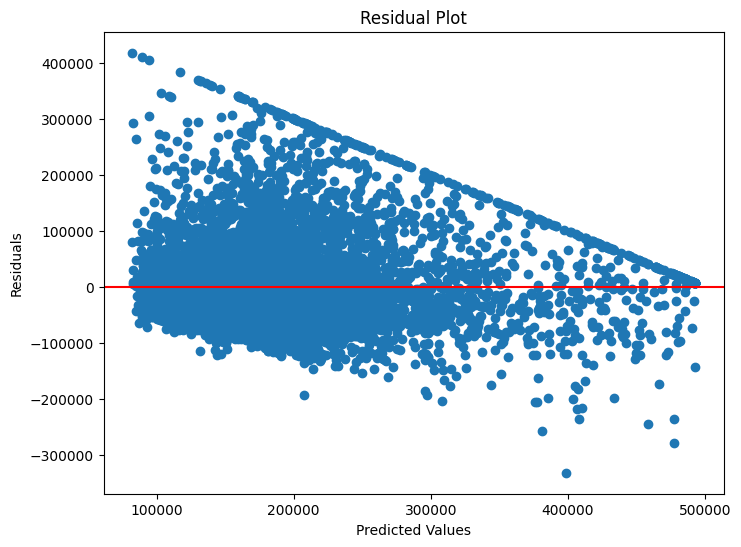

In [ ]:
# Calculate residuals
residuals = y_test_denorm - y_pred_denorm

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_denorm, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


#Hasil Pengerjaan Tugas

**Analisis Algoritma Optimasi Artificial Neural Network (ANN) untuk Model Regresi**

## 1. Pendahuluan
Pada tugas ini, berbagai model Artificial Neural Network (ANN) diterapkan untuk masalah regresi, dengan tujuan untuk meningkatkan performa prediksi dengan menyesuaikan jumlah neuron, hidden layer, fungsi aktivasi, dan hyperparameter lainnya. Selain itu, eksperimen dilakukan dengan menggunakan learning rate scheduler untuk mengoptimalkan proses pelatihan.

## 2. Penjelasan Model ANN
Setiap model yang diuji menggunakan struktur ANN dengan jumlah layer dan neuron yang bervariasi. Model ANN bekerja dengan:

### a. Forward Propagation
- Data input diteruskan melalui layer tersembunyi dan diaktifkan dengan fungsi aktivasi tertentu.
- Setiap neuron dalam layer dihitung sebagai kombinasi linier dari input ditambah bias, kemudian melewati fungsi aktivasi.

### b. Loss Calculation
- Model menggunakan **Huber Loss**, yang merupakan kombinasi antara Mean Squared Error (MSE) dan Mean Absolute Error (MAE).
- Huber Loss lebih tahan terhadap outlier dibandingkan MSE murni, karena memberikan penalti lebih kecil pada kesalahan besar.

### c. Backpropagation & Optimasi
- Menggunakan **Adam Optimizer**, algoritma optimasi yang menggabungkan momentum dan RMSProp.
- Adam memanfaatkan momen adaptif untuk menyesuaikan learning rate dari setiap bobot, sehingga konvergensi lebih stabil dan cepat.

### d. Learning Rate Scheduler
- Learning rate scheduler bertujuan untuk menurunkan learning rate secara bertahap selama pelatihan.
- Ini membantu model mencapai konvergensi dengan lebih baik dan menghindari osilasi dalam update bobot.

### e. Fungsi Aktivasi yang Dicoba
- **Leaky ReLU**: Memperbaiki kelemahan ReLU dengan memungkinkan nilai negatif kecil agar gradien tetap ada.
- **Tanh**: Cocok untuk data yang memiliki nilai positif dan negatif karena rentang outputnya (-1 hingga 1).

## 3. Perbandingan Model

| Model | Aktivasi | Neuron (Layer) | Optimizer | Learning Rate | MAE | MSE | R² Score |
|-------|------------|-----------------|------------|---------------|-------------|---------------|------------|
| **Model 0** | Leaky ReLU + Tanh | (128, 64) + (32, 16) | Adam | Adaptive | 60175.06 | 6.85e9 | 0.4782 |
| **Model 1** | Leaky ReLU | (128, 64) | Adam | Adaptive | 60321.25 | 6.83e9 | **0.4791** |
| **Model 2** | Leaky ReLU | (64, 32) | Adam | Adaptive | 60237.18 | 6.84e9 | 0.4787 |
| **Model 3** | Tanh | (64, 32) | Adam | Adaptive | 60220.96 | 6.88e9 | 0.4758 |
| **Model 4** | Tanh | (128, 64) | Adam | Adaptive | 60487.70 | 6.85e9 | 0.4780 |

## 4. Interpretasi Hasil

### a. Model 1 (Leaky ReLU 128, 64) – Performa Terbaik
- **R² score tertinggi (0.4791)** menunjukkan bahwa model ini mampu menangkap pola lebih baik dibandingkan model lainnya.
- **MSE paling rendah (6.83e9)** menunjukkan bahwa rata-rata kesalahan kuadratnya lebih kecil dibandingkan model lain.
- **Learning rate yang adaptif dengan Adam optimizer** membantu konvergensi lebih cepat dan stabil.

### b. Model 0 (Leaky ReLU + Tanh 128, 64 + 32, 16) – MAE Terendah
- **MAE terendah (60175.06)** menunjukkan bahwa rata-rata kesalahan absolutnya paling kecil.
- Kombinasi **Leaky ReLU dan Tanh** memungkinkan model menangkap pola non-linear lebih baik.
- Namun, **R² lebih rendah dari Model 1**, yang menunjukkan bahwa kompleksitas tambahan belum cukup signifikan meningkatkan prediksi.

### c. Model 2 (Leaky ReLU 64, 32) – Performanya di Bawah Model 1
- **R² (0.4787) sedikit lebih rendah dibandingkan Model 1** karena jumlah neuron lebih sedikit.
- **MSE (6.84e9) lebih tinggi dibandingkan Model 1**, menunjukkan bahwa jumlah neuron lebih kecil bisa menyebabkan kurangnya kapasitas model.

### d. Model 3 (Tanh 64, 32) – Performa Terburuk
- **R² paling rendah (0.4758)** menunjukkan bahwa model kurang mampu menangkap variabilitas data.
- **Penggunaan Tanh kurang optimal**, terutama karena lebih rentan terhadap vanishing gradient dibandingkan Leaky ReLU.

### e. Model 4 (Tanh 128, 64) – Tidak Lebih Baik dari Model 1
- **R² (0.4780) masih lebih rendah dibandingkan Model 1**, yang menunjukkan bahwa penambahan neuron tidak meningkatkan performa secara signifikan.
- **MSE (6.85e9) lebih besar dibandingkan Model 1**, sehingga pemilihan fungsi aktivasi berpengaruh dalam optimasi model.

## 5. Hyperparameter Tuning & Optimasi
Untuk meningkatkan performa model, dilakukan eksperimen dengan:
- **Menambah jumlah neuron dan hidden layer**, tetapi hasil menunjukkan bahwa peningkatan terlalu besar tidak selalu meningkatkan akurasi.
- **Eksperimen dengan fungsi aktivasi** menunjukkan bahwa **Leaky ReLU lebih stabil dibandingkan Tanh**.
- **Learning rate scheduler digunakan** untuk menyesuaikan laju pembelajaran selama pelatihan dan meningkatkan stabilitas konvergensi.

### a. Pengaruh Jumlah Neuron dan Hidden Layer
- Model dengan lebih banyak neuron dan hidden layer memiliki kapasitas lebih besar untuk menangkap pola kompleks.
- Namun, peningkatan yang berlebihan dapat menyebabkan **overfitting**, sehingga perlu keseimbangan antara kompleksitas dan generalisasi.

### b. Pengaruh Learning Rate
- Learning rate yang terlalu tinggi menyebabkan model gagal konvergen, sementara learning rate yang terlalu kecil memperlambat pembelajaran.
- Penggunaan **learning rate scheduler** membantu model menyesuaikan laju pembelajaran secara dinamis.

### c. Pengaruh Fungsi Aktivasi
- **Leaky ReLU lebih baik dibandingkan Tanh**, terutama dalam model dengan banyak neuron, karena menghindari masalah vanishing gradient yang sering terjadi pada Tanh.
- **Tanh masih berguna** dalam beberapa kasus karena memberikan output dalam skala -1 hingga 1, tetapi lebih cocok untuk model dengan sedikit hidden layer.

### d. Pengaruh Hyperparameter Lainnya
- **Batch size dan jumlah epoch mempengaruhi kestabilan pelatihan**.
- Model yang diuji menggunakan **Adam Optimizer**, yang secara umum lebih unggul dibandingkan SGD dalam konvergensi yang cepat dan stabil.

## 6. Kesimpulan & Rekomendasi
Berdasarkan hasil evaluasi:
- **Leaky ReLU memberikan hasil lebih stabil dibandingkan Tanh**, terutama pada jumlah neuron yang lebih besar.
- **Model 1 (Leaky ReLU 128, 64) memberikan keseimbangan terbaik antara R² score dan error**, sehingga merupakan model paling optimal dalam eksperimen ini.
- **Model 0 dengan kombinasi Leaky ReLU + Tanh dapat mempertahankan MAE lebih rendah**, tetapi tidak memberikan peningkatan R² yang signifikan.
- **Model 3 dan 4 dengan aktivasi Tanh kurang optimal**, terutama dalam menangani regresi data yang kompleks.
- **Perlu eksplorasi tambahan dengan menambah jumlah neuron atau hidden layer** untuk meningkatkan performa lebih lanjut.
- **Dapat dicoba teknik lain seperti dropout atau batch normalization** untuk melihat dampaknya pada performa model.

